# Superstore Analysis 
Task 3 at The Sparke Foundation Intern

### Import Helper Libraries 

In [647]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [581]:
warnings.filterwarnings('ignore')

In [582]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Set1', rc = {'figure.figsize' : (8 , 4)})

### Univariate Analysis & Data understanding 

In [583]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [584]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Check Data Info For Missing Vales & Data Types Representation

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### No Missing records 

In [586]:
df.isnull().mean()

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

### There were Some Duplicated Data 

In [587]:
df.duplicated().sum()

17

In [588]:
df.drop_duplicates(inplace = True , ignore_index = True)

### Univariate Analysis To Explore Our Data Feature 

In [589]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [590]:
df['Ship Mode'].value_counts().values

array([5955, 1943, 1537,  542], dtype=int64)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

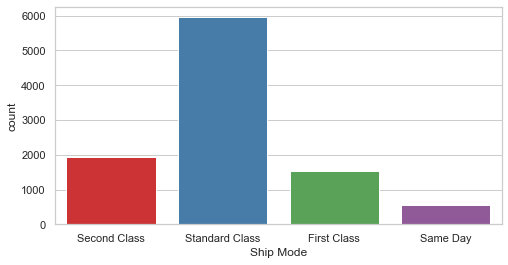

In [591]:
sns.countplot(x = df['Ship Mode'])

In [592]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:xlabel='Segment', ylabel='count'>

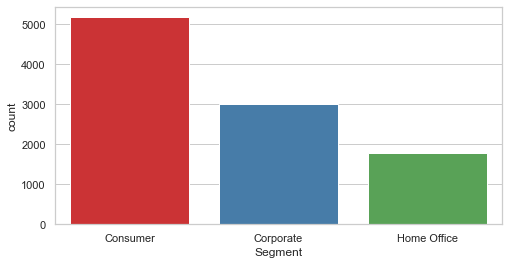

In [593]:
sns.countplot(df['Segment'])

In [594]:
df['Country'].unique()

array(['United States'], dtype=object)

In [595]:
df.drop(['Country'] , axis = 1 , inplace = True)

In [596]:
df['City'].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [597]:
df['State'].sort_values().unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [598]:
df['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    199
10011    192
        ... 
27534      1
53186      1
32503      1
94509      1
63376      1
Name: Postal Code, Length: 631, dtype: int64

In [599]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='count'>

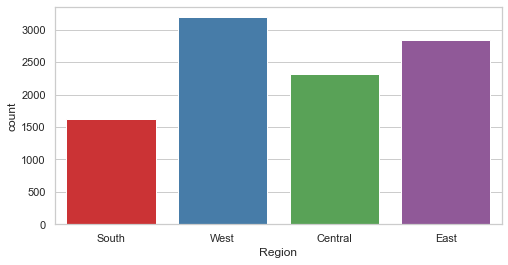

In [600]:
sns.countplot(df['Region'])

In [601]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

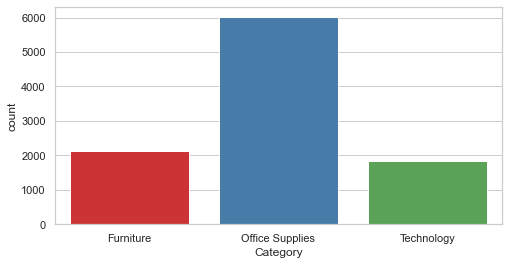

In [602]:
sns.countplot(df['Category'])

In [603]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

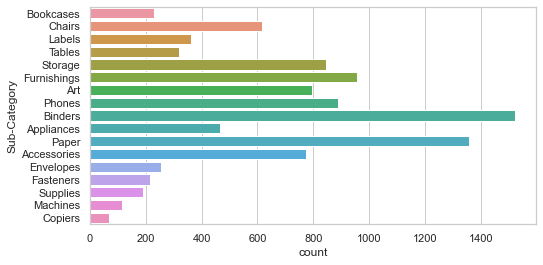

In [604]:
sns.countplot(y = df['Sub-Category'])

In [605]:
df['Sales'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Sales,9977.0,230.148902,623.721409,0.444,17.3,54.816,209.97,22638.48


<AxesSubplot:xlabel='Sales', ylabel='Density'>

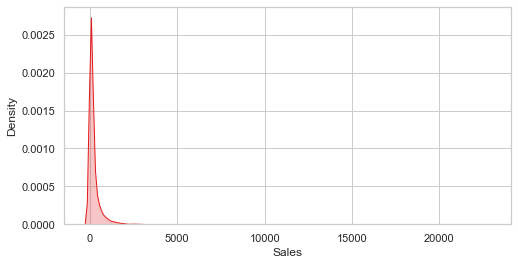

In [606]:
sns.kdeplot(df['Sales'] , shade = True)

<AxesSubplot:xlabel='Sales'>

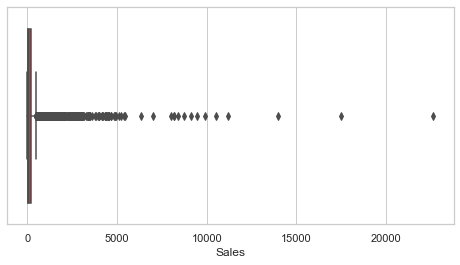

In [607]:
sns.boxplot(df['Sales'])

In [608]:
df.drop(df[df['Sales'] > 5000].index , inplace = True , axis = 0)

In [609]:
df.reset_index(inplace = True , drop = True)

In [610]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [611]:
df['Discount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Discount,9958.0,0.156356,0.206488,0.0,0.0,0.2,0.2,0.8


<AxesSubplot:xlabel='Discount', ylabel='Density'>

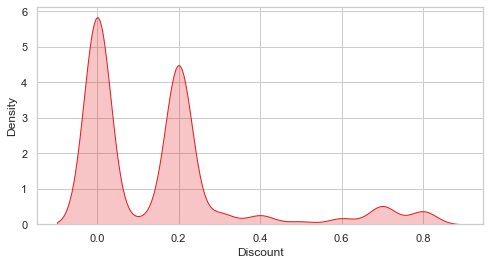

In [612]:
sns.kdeplot(df['Discount'] , shade = True)

In [613]:
df['Profit'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Profit,9958.0,24.021904,167.758133,-6599.978,1.7248,8.6356,29.2669,2400.9657


<AxesSubplot:xlabel='Profit', ylabel='Density'>

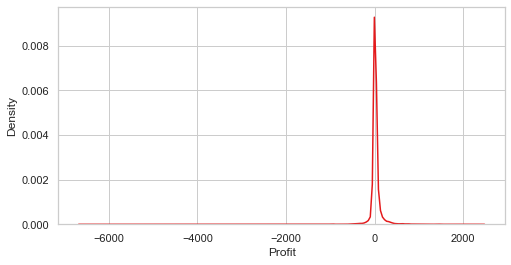

In [614]:
sns.kdeplot(df['Profit'])

<AxesSubplot:xlabel='Profit'>

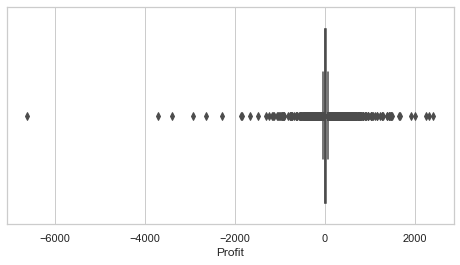

In [615]:
sns.boxplot(df['Profit'])

In [616]:
df[df['Profit'] < -2000]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3004,Standard Class,Home Office,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
3144,First Class,Consumer,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
4977,Standard Class,Corporate,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
5296,First Class,Consumer,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
7745,Standard Class,Consumer,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
9738,Standard Class,Consumer,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928


In [617]:
df.drop(df[df['Profit'] < -2000].index , axis = 0 , inplace = True)

In [618]:
df.reset_index(inplace = True , drop = True)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

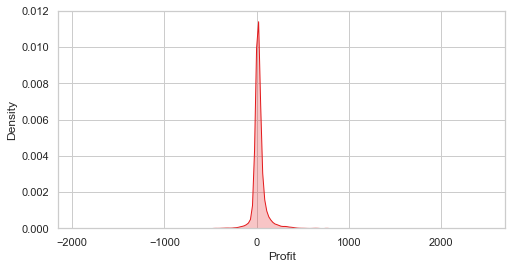

In [619]:
sns.kdeplot(df['Profit'] , shade = True)

In [620]:
df.to_csv('Cleaned SampleSuperstore.csv' , index = False)

## Bivariate Analysis

#### 1-  Which Ship Mode Gain More Profit ?

In [621]:
group = df.groupby(['Ship Mode']).agg(['sum'])['Profit'].sort_values(by = 'sum' ,ascending = False )
group

,sum
Ship Mode,
Standard Class,146000.9544
Second Class,51814.9400
First Class,43241.4597
Same Day,19711.8773


<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

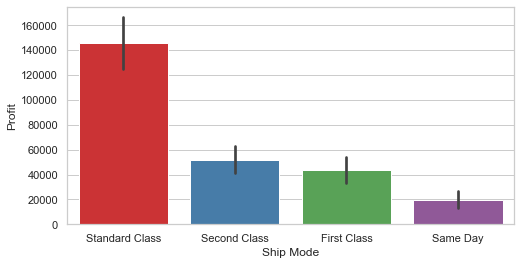

In [622]:
sns.barplot(df['Ship Mode'] , df['Profit'] , estimator = np.sum , order = group.index)

#### 2- Which Segment Gain More Profit ?

In [623]:
df.groupby(['Segment']).agg(['sum'])['Profit'].sort_values(by = 'sum' , ascending = False).T

Segment,Consumer,Corporate,Home Office
sum,117091.0948,84700.0223,58978.1143


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

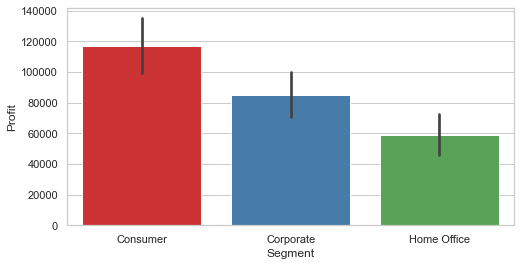

In [624]:
sns.barplot(df['Segment'] , df['Profit'] , estimator = np.sum)

#### 3- What Is Top & Least 5 Cities That Gain More Profit & What Is Average Profit For Each One ?

In [625]:
group_max = df.groupby(['City']).agg(['sum' , np.mean])['Profit'].sort_values(by = 'sum' , ascending = False).head()
group_min = df.groupby(['City']).agg(['sum' , np.mean])['Profit'].sort_values(by = 'sum').head()
display(group_max) , display(group_min)

,sum,mean
City,,
New York City,54501.9317,59.826489
Los Angeles,30431.4267,40.792797
Seattle,22401.7017,52.959106
San Francisco,17138.6126,33.937847
Detroit,8200.3235,72.569235


,sum,mean
City,,
Philadelphia,-14963.2074,-27.968612
Houston,-7887.3935,-21.089287
Chicago,-3718.8473,-11.919382
Dallas,-2846.5257,-18.130737
Phoenix,-2790.8832,-44.299733


(None, None)

<AxesSubplot:xlabel='City', ylabel='Profit'>

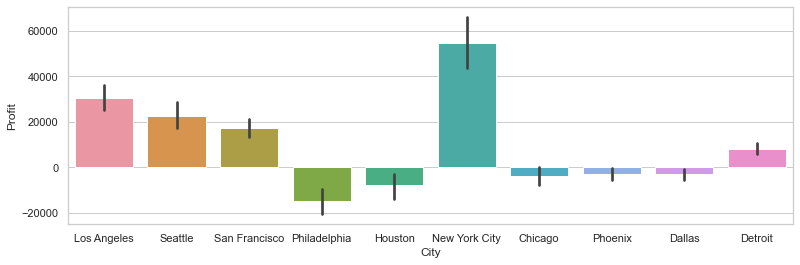

In [626]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Set1', rc = {'figure.figsize' : (13 , 4)})
sns.barplot(data = df[(df['City'].isin(group_max.index))|(df['City'].isin(group_min.index))] , x = 'City' , y = 'Profit' , estimator = np.sum , )

<AxesSubplot:xlabel='City', ylabel='Profit'>

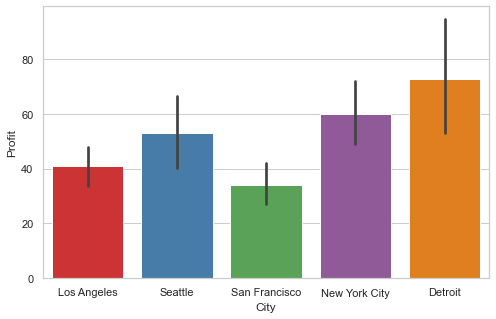

In [627]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Set1', rc = {'figure.figsize' : (8 , 5)})
sns.barplot(data = df[df['City'].isin(group_max.index)] , x = 'City' , y = 'Profit' , estimator = np.mean)

#### 4- For Costa Mesa City Which State Gain More Profit ?

In [628]:
df[df['City'] == 'Costa Mesa'].groupby(['State']).agg(['sum'])['Profit']

,sum
State,
California,297.2089


#### 5- For California State Which Segment Is The Most Popular ?

In [629]:
df[df['State'] == 'California']['Segment'].value_counts().to_frame().sort_values(by = 'Segment' , ascending = False)

,Segment
Consumer,1044
Corporate,616
Home Office,334


<AxesSubplot:xlabel='Segment', ylabel='count'>

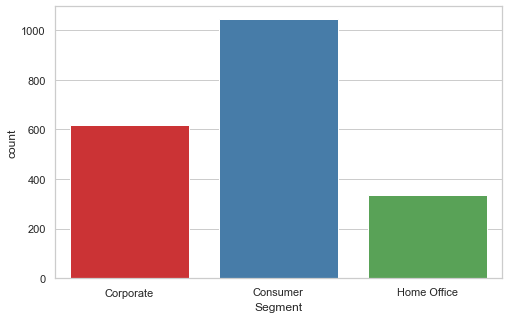

In [630]:
sns.countplot(data = df[df['State'] == 'California'] , x = 'Segment')

#### 6- Which Region That Gain More Profit & What is Avergae Discount For Each One ?

In [631]:
df.groupby(['Region']).agg(['sum' , np.mean])[['Discount' , 'Profit']]

Discount                 Profit           
             sum      mean          sum       mean
Region                                            
Central   554.34  0.239870   29453.9834  12.745125
East      411.50  0.145099   82116.3918  28.955004
South     237.55  0.146999   46423.0401  28.727129
West      349.10  0.109470  102775.8161  32.228227

<AxesSubplot:xlabel='Region', ylabel='Profit'>

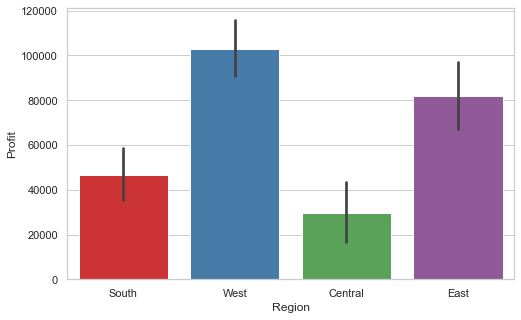

In [632]:
sns.barplot(x = df['Region'] , y = df['Profit'] , estimator = np.sum)

<AxesSubplot:xlabel='Region', ylabel='Discount'>

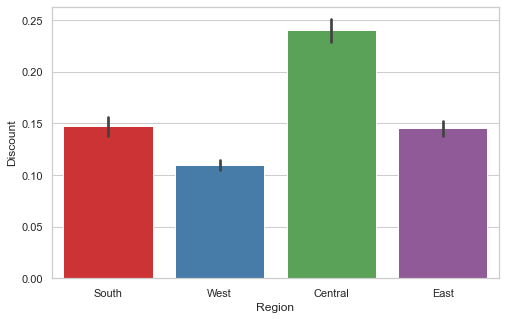

In [633]:
sns.barplot(x = df['Region'] , y = df['Discount'] , estimator = np.mean)

#### 7- For South Region Which Category Gain More Profit ?

In [634]:
df[df['Region'] == 'South'].groupby('Category').agg(['sum'])['Profit'].sort_values(by = 'sum' , ascending = False)

,sum
Category,
Technology,22842.9162
Office Supplies,16808.9178
Furniture,6771.2061


<AxesSubplot:xlabel='Category', ylabel='Profit'>

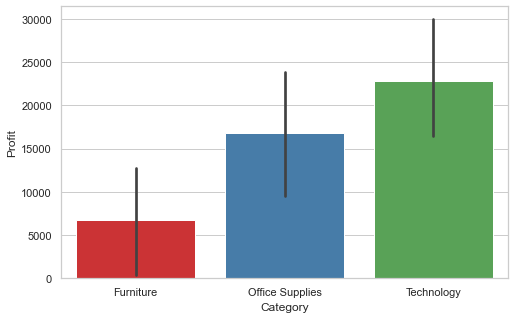

In [635]:
sns.barplot(data = df[df['Region'] == 'South'] , x = 'Category' , y = 'Profit' , estimator = np.sum)

#### 8- Which Sub-Category is most Sales ?

In [636]:
group = df.groupby(['Sub-Category']).agg([np.sum])['Sales'].sort_values(by = 'sum' , ascending = False)
group

,sum
Sub-Category,
Phones,330007.0540
Chairs,327777.7610
Storage,223843.6080
Tables,206965.5320
Accessories,167380.3180
Binders,161590.8470
Bookcases,114879.9963
Machines,111540.4550
Appliances,107532.1610


<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

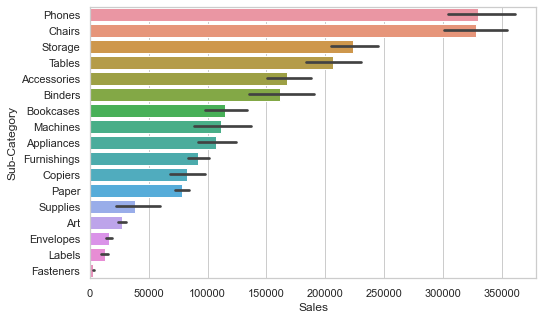

In [637]:
sns.barplot(y = df['Sub-Category'] , x = df['Sales'] , estimator = np.sum , order = group.index , )

#### 9- For Each Sub-Category What is Max Number Of Quantity ?

In [638]:
df.groupby(['Sub-Category']).agg([np.max])['Quantity'].sort_values(by = 'amax' , ascending = False)

,amax
Sub-Category,
Accessories,14
Appliances,14
Storage,14
Phones,14
Paper,14
Labels,14
Furnishings,14
Fasteners,14
Chairs,14


<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

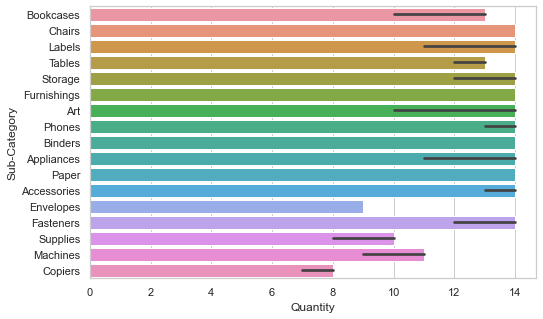

In [639]:
sns.barplot(y = df['Sub-Category'] , x = df['Quantity'] , estimator = np.max)

#### 10- Correlation Between Profit , Sales , Discount ?

<AxesSubplot:>

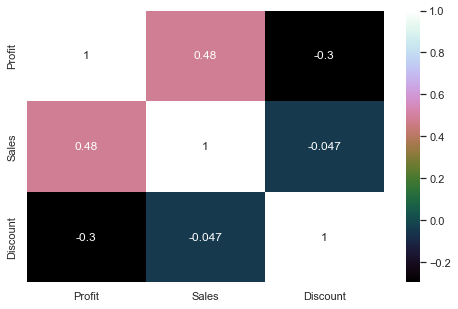

In [640]:
sns.heatmap(df[['Profit' , 'Sales' , 'Discount']].corr() , annot = True , cmap = 'cubehelix')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

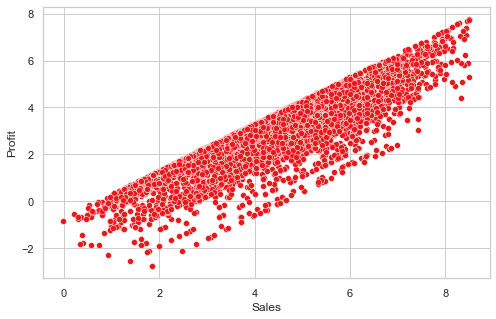

In [641]:
sns.scatterplot(x = np.log(df['Sales']) , y = np.log(df['Profit']))

#### 11- Which Discount That Make Loss in Profit ?

In [642]:
df.groupby(['Discount']).agg([np.sum])['Profit'].sort_values(by = 'sum' , ascending = False)

,sum
Discount,
0.00,273748.5174
0.20,84480.1332
0.10,9029.1770
0.15,1418.9915
0.32,-2391.1377
0.45,-2493.1111
0.60,-5944.6552
0.30,-10357.2186
0.50,-14855.3593


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

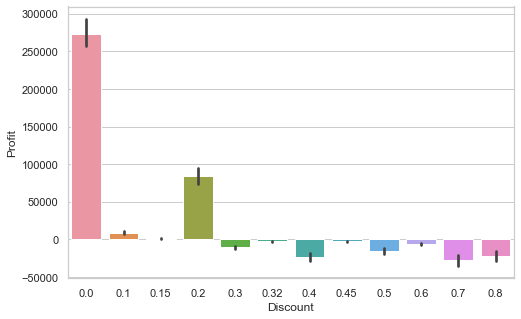

In [643]:
sns.barplot(x = df['Discount'] , y = df['Profit'] , estimator = np.sum)

#### For each Region Which segment Gain More Profit ?

In [644]:
pivt = pd.pivot_table(data = df , columns = 'Region' , index = 'Segment' , values = 'Profit' , aggfunc = np.sum)
pivt

Region,Central,East,South,West
Segment,,,,
Consumer,3781.3667,42007.8975,20936.1138,50365.7168
Corporate,13234.2043,19904.6075,19055.2136,32505.9969
Home Office,12438.4124,20203.8868,6431.7127,19904.1024


<AxesSubplot:xlabel='Region', ylabel='Segment'>

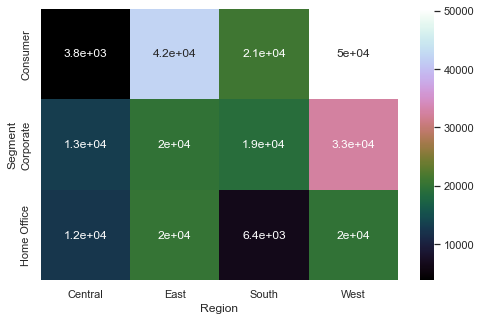

In [645]:
sns.heatmap(pivt , annot = True ,cmap = 'cubehelix')

<AxesSubplot:xlabel='Region', ylabel='Profit'>

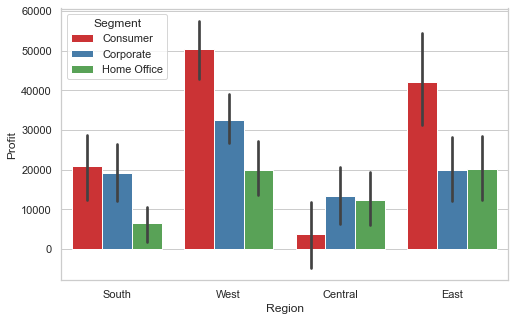

In [646]:
sns.barplot(data = df , x = 'Region' , y = 'Profit' , hue = 'Segment' , estimator = np.sum)